In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test =  pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

train = train.drop(columns=['label']).to_numpy() / 255.0
test = test.to_numpy() / 255.0

In [3]:
train.shape, test.shape

((42000, 784), (28000, 784))

In [4]:
train_loader = DataLoader(train, batch_size=16, shuffle=True)
test_loader = DataLoader(test, batch_size=64, shuffle=False)

In [5]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(784, 32),
            nn.ReLU()
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(32, 784),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Autoencoder().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [7]:
num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    train_loss = 0

    for data in train_loader:
        
        data = data.to(device).float()
        reconstructed = model(data)
        
        loss = criterion(reconstructed, data)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    train_loss /= len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}")

Epoch [1/30], Loss: 0.2785
Epoch [2/30], Loss: 0.1893
Epoch [3/30], Loss: 0.1649
Epoch [4/30], Loss: 0.1479
Epoch [5/30], Loss: 0.1361
Epoch [6/30], Loss: 0.1277
Epoch [7/30], Loss: 0.1213
Epoch [8/30], Loss: 0.1162
Epoch [9/30], Loss: 0.1122
Epoch [10/30], Loss: 0.1090
Epoch [11/30], Loss: 0.1064
Epoch [12/30], Loss: 0.1044
Epoch [13/30], Loss: 0.1027
Epoch [14/30], Loss: 0.1014
Epoch [15/30], Loss: 0.1004
Epoch [16/30], Loss: 0.0995
Epoch [17/30], Loss: 0.0988
Epoch [18/30], Loss: 0.0982
Epoch [19/30], Loss: 0.0978
Epoch [20/30], Loss: 0.0974
Epoch [21/30], Loss: 0.0970
Epoch [22/30], Loss: 0.0967
Epoch [23/30], Loss: 0.0965
Epoch [24/30], Loss: 0.0963
Epoch [25/30], Loss: 0.0961
Epoch [26/30], Loss: 0.0959
Epoch [27/30], Loss: 0.0958
Epoch [28/30], Loss: 0.0956
Epoch [29/30], Loss: 0.0955
Epoch [30/30], Loss: 0.0954


In [8]:
model.eval()
test_loss = 0

with torch.no_grad():
    for data in test_loader:
        data = data.to(device).float()
        reconstructed = model(data)
        loss = criterion(reconstructed, data)
        test_loss += loss.item()

test_loss /= len(test_loader)
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 0.0956


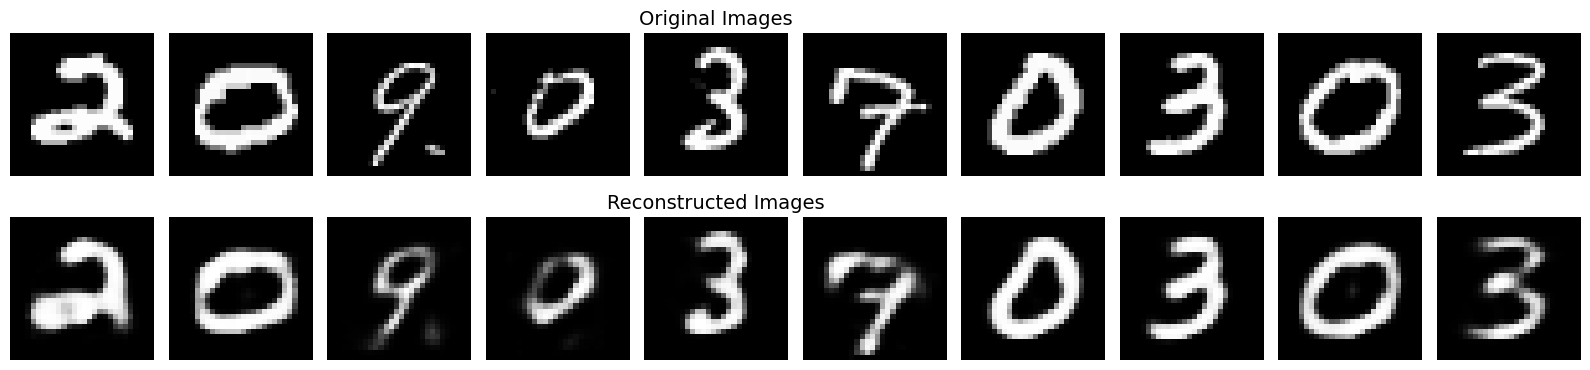

In [9]:
test_batch = next(iter(test_loader)).to(device).float()

with torch.no_grad():
    reconstructed_batch = model(test_batch)

num_images = 10
plt.figure(figsize=(16, 4))

for i in range(num_images):
    plt.subplot(2, num_images, i + 1)
    plt.imshow(test_batch[i].cpu().numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')

for i in range(num_images):
    plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(reconstructed_batch[i].cpu().numpy().reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.subplot(2, num_images, num_images // 2)
plt.title("Original Images", fontsize=14)

plt.subplot(2, num_images, num_images // 2 + num_images)
plt.title("Reconstructed Images", fontsize=14)

plt.tight_layout()
plt.show()